# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
#randomly split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85714286, random_state=42)
print(len(X_train))

60000


### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

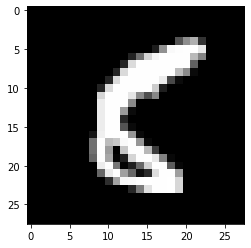

In [5]:
plt.imshow(X_train[223,:].reshape(28,28), cmap='gray')

In [6]:
print(y_train[223])

8


### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [13]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
%time
clf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


GaussianNB()

In [22]:
#Simple linear model
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log', max_iter=100)
%time
sgd.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=100)

In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
%time
rf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


RandomForestClassifier()

In [31]:
#comparison Naive Bayes
from sklearn.metrics import accuracy_score
clf_train_acc=accuracy_score(y_train,clf.predict(X_train))
clf_train_acc

0.5571666666666667

In [32]:
#comparison Simple linear model
sgd_train_acc=accuracy_score(y_train,sgd.predict(X_train))
sgd_train_acc

0.8871833333333333

In [33]:
#comparison Random Forest
rf_train_acc=accuracy_score(y_train,rf.predict(X_train))
rf_train_acc

1.0

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [36]:
#test accuracy
clf_test_acc=accuracy_score(y_test,clf.predict(X_test))
clf_test_acc

0.5604

In [37]:
sgd_test_acc=accuracy_score(y_test,sgd.predict(X_test))
sgd_test_acc

0.874

In [39]:
rf_test_acc=accuracy_score(y_test,rf.predict(X_test))
rf_test_acc

0.9661

In [41]:
#F-Measure
from sklearn.metrics import f1_score
clf_f1=f1_score(y_test,clf.predict(X_test),average='micro')
clf_f1

0.5604

In [42]:
sgd_f1=f1_score(y_test,sgd.predict(X_test),average='micro')
sgd_f1

0.874

In [43]:
rf_f1=f1_score(y_test,rf.predict(X_test),average='micro')
rf_f1

0.9661

In [47]:
from sklearn import metrics
y_5=y_test=='5'
clf_5 = clf.predict(X_test)=='5'
sgd_5 = sgd.predict(X_test)=='5'
rf_5 = rf.predict(X_test)=='5'

In [52]:
clf_fpr, clf_tpr, clf_thresholds = metrics.roc_curve(y_5, clf_5)
print(clf_fpr, clf_tpr, clf_thresholds)

[0.         0.00253779 1.        ] [0.         0.05122732 1.        ] [2 1 0]


In [54]:
sgd_fpr, sgd_tpr, sgd_thresholds = metrics.roc_curve(y_5, sgd_5)
print(sgd_fpr, sgd_tpr, sgd_thresholds)

[0.         0.01401302 1.        ] [0.         0.76627535 1.        ] [2 1 0]


In [53]:
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_5, rf_5)
print(rf_fpr, rf_tpr, rf_thresholds)

[0.         0.00286881 1.        ] [0.         0.96264674 1.        ] [2 1 0]
